# Generate random data in a subspace

In this example we will look into a case where some data points are trapped in a (by definition lower dimensional) subspace where the actual dimension of the data (in many cases much) higher.  
Assume that data points $\mathbf{c}_i \in \mathbb{R}^n$ and columns of data matrix $\mathbf{M}$ are fromed by $\mathbf{c}_i$.  
If it is known that _rank_$(\mathbf{M}) = d \leq n$, we can conclude that the data lives in a subspce. But in many practical cases _rank_$(\mathbf{M}) = d << n$.  

For example consider the illumination problem, where instances of an image are shown to lie in a 9-dimensional subspace. Note that images themselves are are $16\times16$, which implies that, images lie in some $256$ dimensional space.  
Check these papers out for details:  
- [Lambertian reflectance and linear subspaces](https://ieeexplore.ieee.org/document/1177153)
- [Clustering appearances of objects under varying illumination conditions](https://ieeexplore.ieee.org/document/1211332)

You should also be able to reach them through these links using METU VPN.

To sum up, low-rank data matrices is common practice where you will try to discover the nature of these data in lower dimension subspaces.

Now the question is, _how can we generate a data matrix that is low-rank?_  
We will start with the simple case that, all data is entrapped in $1$ subspace.  
In general note that, your data might come from union of subspaces. Using the face illumination example, if all images in your data belong to the same pose of the same person under different lighting conditions, we know that data will lie in some $9$ dimensional subspace. However, if you data includes 3 different pose from 3 people, than, each of these faces will live in their own $9$ dimensional subspace where as the rank of your data matrix in this case could go all the way up to $27$ if these subspaces turn out to be independent.

Let's continue with the simpler case starting with the imports.


##Getting ready with imports
In this assignment you are only allowed to import numpy

In [ ]:
import numpy as np
from scipy.linalg import orth
# import plotting libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

# also import the matrix printing function
!rm bug_numpy_utils.py 2> dump.me
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint
from bug_numpy_utils import CData
print('done with importing necessary stuff')

--2024-10-31 20:24:03--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18456 (18K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  18.02K  --.-KB/s    in 0s      

2024-10-31 20:24:03 (86.4 MB/s) - ‘bug_numpy_utils.py’ saved [18456/18456]

done with importing necessary stuff


## Random data in a Subspace
Our simple implementation will accept the ambient dimension of the data $n$, number of data points to be generated $m$ and the dimension of the subspace $d$ in which all datapoints live and return $\mathbf{M}_{nxm}$, i.e. the low-rank data matrix which is a numpy array.

In other words, your function returns a matrix $\mathbf{M}_{nxm}$ where columns of $\mathbf{M}$ are $\{ \mathbf{c}_1, \mathbf{c}_2, ... \mathbf{c}_m  \}$ where $\mathbf{c}_i \in \mathbb{R}^d$. Naturall we expect that $d \leq n$

In order to be convincing, that the subspace is *spanned* by the data (or by a subset of it) we would expect $ d \leq m$.  


###Now let's get to the meat of it
We will assume that by default user wants to *create a plane* in $\mathbb{R}^3$ and return $50$ points from this *plane*


In [ ]:
def DataInSubspace(n=3,m=50, d=2, normal_dist = True):
  '''
  This function generates an nxm data matrix M,
  where columns of M come from d-dimensional subspace
  Hence all parameters are expected to be positive where
  n >= d
  and
  m >= d
  Returns:
    a numpy array of shape (n,m) if you passed proper parameters
    [] if you passed improper set of parameters
  '''
  if normal_dist: # data will be drawn from a normal distribution
    genData = np.random.randn
  else: # data will be uniformly drawn from [0-1]
    genData = np.random.rand
  M = np.array([]) # let's start with an empty array
  if isinstance(n,(int,float)) and isinstance(m,(int,float)) and isinstance(d,(int,float)): # they should also be meaningful in content
    if n>0 and m>0 and d>0:
      if d <= n: # almost there
        if d <= m: # finally
          '''
          pay attention to the fact that meat of the code is here, rest is just safe guarding
          eventough all of this part can be written in a single line statement let's go step by step
          recall that our data points to live in a d-dimensional subpace
          where data points come from n-dimensional space
          so let's generate a d-dimensional basis in n-dimensional space
          '''
          B = genData(n,d) # no more np.random.randn(n,d) or np.random.rand(n,d)
          '''
          due to the random nature of well, random, rank(B) should be d given that d<=n
          however to dodge the bullet of an ill-conditioned data matrix, let's
          go for an orthogonal basis
          at this point if you will feel better, you can check the rank of B
          and generate it again if rank is < d, but highly unlikely
          now that B is not square in most cases, you cannot check the determinant
          for ill-conditioned cases. Wait for SVD down the road!
          '''
          B = orth(B)
          # finally, let's generate m-many data points using B as their basis
          # now that question does not impose any norm on data, we will be happy with random
          M = np.matmul(B, genData(d,m)) # no more np.random.randn(d,m) ...
          # note that you can also use rand function, what will change between randn and rand?
        else:
          print(f'Number of data should not be less than subspace dimension, othersise there is no way to define this subspace with that much data, check out the help:\n{DataInSubspace.__doc__}')
      else:
        print(f'Subspace dimension cannot be larger than the ambient space, check out the help:\n{DataInSubspace.__doc__}')
    else:
      print(f'You should pass positive integers to this function, check out the help:\n{DataInSubspace.__doc__}')
  else:
    print(f'You should pass numbers to this function, check out the help:\n{DataInSubspace.__doc__}')
  return M

###Test the code
Without a test, it would not be complete
Note that previously implemented `MatPrint()` function works better than print in most cases.

In [ ]:
M = DataInSubspace(5, 10, 3)
MatPrint(M)
print(f'\nrank(M)={np.linalg.matrix_rank(M)}')

Matrix:
|     0.30    -0.59     0.50    -0.76     0.14    -0.09     0.15     0.46     0.18     0.69 |
|     0.57    -0.65     0.31    -0.60    -0.51     0.37    -0.08     0.39    -0.70     1.09 |
|     0.47     0.25     0.11     0.58    -0.54     0.92     0.28    -0.23    -0.56     0.47 |
|    -0.25    -0.27    -0.07    -0.49     0.27    -0.59    -0.25     0.21     0.23    -0.18 |
|    -0.17    -1.29    -0.47    -1.63    -0.43    -1.08    -1.29     0.75    -1.05     0.54 |

rank(M)=3


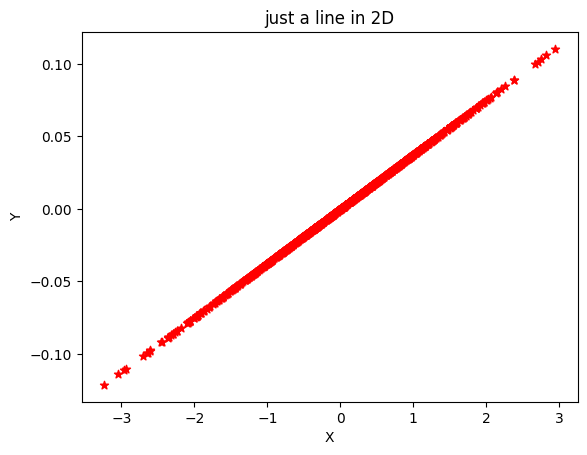

In [ ]:
# generate data - play with number of data points to observe that as m gets
# larger the plane will be gradually covered more

# for testing to see data in 3D
CData(DataInSubspace(m=1000), 'randomized using normal distribution')
# check out the difference in plane if data is not from a normal distribution
CData(DataInSubspace(m=1000, normal_dist=False), 'randomized using uniform distribution')
# you can also see data in 2D but not that fun, only the slope of the line will change
CData(DataInSubspace(2, 1000, 1), 'just a line in 2D')



### Dynamic intercaction with plots using **ipyvolume**
This library is not included by default you need to install it with *pip* first.


In [ ]:
# for dynamic interaction try ipyvolume
!pip install ipyvolume
import ipyvolume as ipv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.1 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
#generate data
M = DataInSubspace(m=1000)
fig = ipv.figure()
scatter = ipv.scatter(M[0,:], M[1,:], M[2,:], marker="sphere")
ipv.show()
#ipv.quickscatter(M[0,:], M[1,:], M[2,:], size=1, marker="sphere")

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

If you do not see anything with ipyvolume, well the bad news is, *Google Colab* does not like it much. But you can download this _ipynb_ to your computer and run it there.  
In my case, it did NOT work on Safari brower, but worked nicely on Firefox and Chrome. Shame on you Safari.  

Note that running a notebook locally on jupyter might require that you need to install many of the libraries that *Google Colab* already had installed. Becareful, and follow the error messages. They will be mostly about missing libraries.

# Data in Union of Subspaces
What if there are multiple subspaces and we need data from each subspace separately.

Let's write a function taht accepts a number ```d```, and two lists, ```D``` and ```N``` where:
- ```d``` is dimension of the space from which data points are randomly drawn.   
- ```D``` is a list that contains the dimensions of the subspaces of $\mathbb{R}^d$.  
- ```N``` is also a list that contains the number of data that will be randomly generated in each subspace where the corresponding dimension is given in ```D```.  

In order to have a meaningful input, caller should guarantee that:
> ```d >= max(D)```  

It should also be noted that, if you would like to make sure that, subspaces are **independent** you should start by checking if:  
> ```d >= sum(D)```  

else subspaces will be disjoint.  

Another note will be that, if you want to be able to identify / discover the subspaces from the data, each subspace should contain enough data. This implies that, number of data in each subspace should be at least 1 more than its dimension. Hence, to verify this, you can check that  
> ```D[i] <= N[i] + 1```

It is also implied that all subspaces should be randomly generated, and should be seperate, even if they happen to have the same dimension. In otherwords, you should have at least one data point which can be written in terms of the remaining data points.

Function returns a numpy array that is $\mathbf{M}_{dxn}$, where $n$ is the sum of the elements in list $N$, i.e. in python:
```
d = N.sum()
```  

In other words, your function returns a matrix $\mathbf{M}_{dxn}$ where first ```N[0]``` columns of $\mathbf{M}$ are coming from a ```D[0]``` dimensional subspace of $\mathbb{R}^d$. Following columsn are similarly generated...


In [ ]:
def DataFromUnionOfSubspaces(d=3,D=[1,2], N=[20,200], data_scaler=1, normal_data = True):
  '''
  This function accepts d, D, N where:
  d is the dimension of the vector space from which data is randomly drawn
  D is a list containing dimensions of subspaces
  N is also a list  and containsthe data in subspaces that correspond the
  dimensions given in D

  Optionally you can:
  - scale data using data_scaler, which is 1 by default
  - decide if you want a uniform or normal distribution
  from which data will be chosen using normal_data, by default it uses normal distribution

  returns data matrix M

  By default function returns 20 points from a line, and 200 points from a plane in R3
  M is 3x220

  Another example:
  If the function is called as follows:
  DataFromUnionOfSubspaces(5, [2, 2], [200, 300])
  the function will return M such that
  M is 5x500 (200 points in the first 2D subspace, and 300 in the second)
  '''
  M = np.empty((d,0)) # start with an empty matrix or proper number of rows and 0 columns!
  # data can be randomly selected from
  try:
    if normal_data:
      genData = np.random.randn
    else:
      genData = np.random.rand
    # let's start with loose checks -
    # i.e. we will not check for independce and discoverability, that's up to the user

    if d >= max(D) and len(D) == len(N): # we are good to go
      # let's go over the element in D
      for i, Sdim in enumerate(D):  # go over subspace dimensions and add data to M
        # generate basis
        B = genData(d,Sdim) * data_scaler
        # generate data using B
        R = np.matmul(B, genData(Sdim, N[i]))
        # append new data as columns to M
        M = np.append(M, R, axis=1)
    # we should be done, return M
    return M
  except:
    print('crash and burn experienced in DataFromUnionOfSubspaces... go figure')
    return M

## Testing Data Generation:  
Call the function:  
1. without any parameters, i.e. default
2. in order to be able to print the data in this part try to focus on $d=3$ and content of $D$


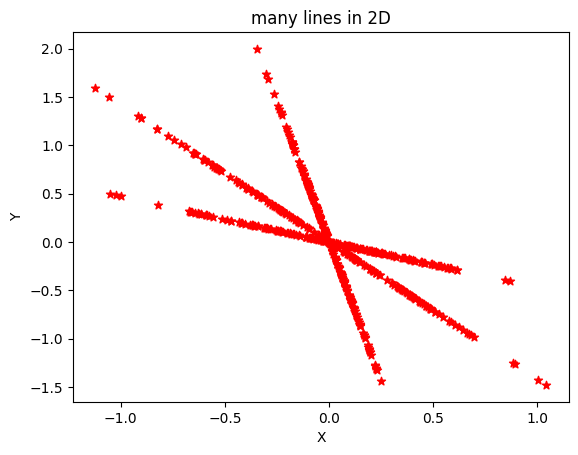

In [ ]:
# try the default
CData(DataFromUnionOfSubspaces(), 'default test')

# try by changing paramters in 3D
Ds = [1,1,2,1]
Ns = [100, 100, 1000, 100]
CData(DataFromUnionOfSubspaces(D=Ds, N=Ns, normal_data=False), 'lines and a plane', Ns)

# check out data_scaler
Ds = [1,1,2,1]
Ns = [100, 100, 1000, 100]
CData(DataFromUnionOfSubspaces(D=Ds, N=Ns, data_scaler=100), 'using data_scaler check the bounds', Ns)

# try in 2D
CData(DataFromUnionOfSubspaces(2, [1,1,1], [200, 200, 200]), 'many lines in 2D',)

